In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Train_SU63ISt.csv")
test = pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [4]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
# Convert object type to datetime type
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 

In [6]:
for i in (train,test):
    i['year'] = i.Datetime.dt.year
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [7]:
# Get day of the week
train['day of week']=train['Datetime'].dt.dayofweek

In [8]:
# assign 1 if it is weekend and 0 for weekday
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

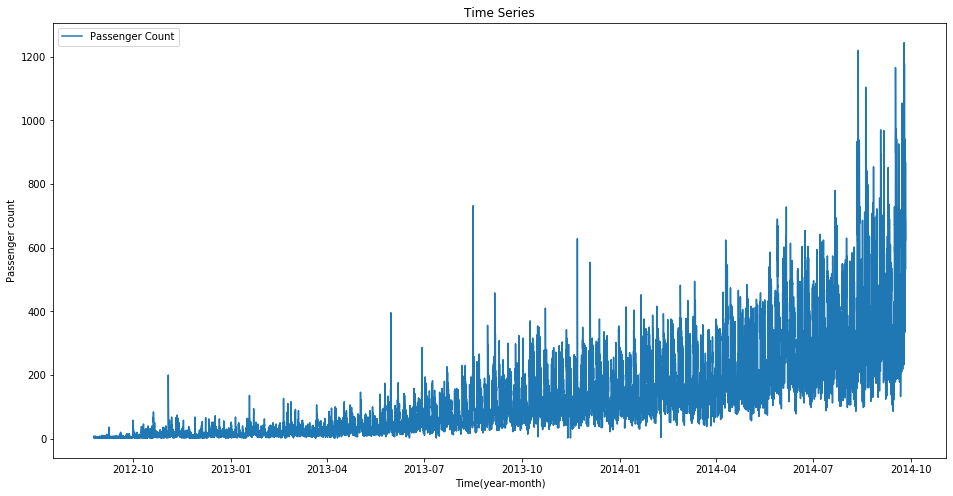

In [9]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis.
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

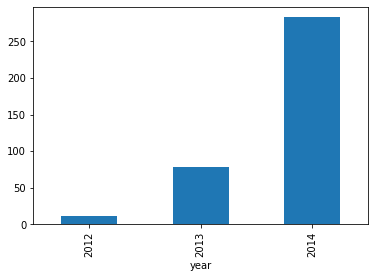

In [10]:
train.groupby('year')['Count'].mean().plot.bar()
#Traffic will increase as the years pass by

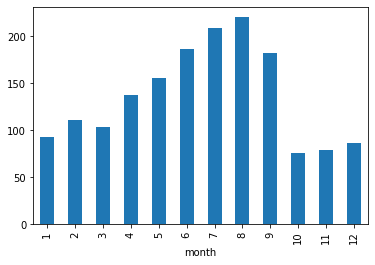

In [11]:
train.groupby('month')['Count'].mean().plot.bar()
#Traffic will be high from May to October

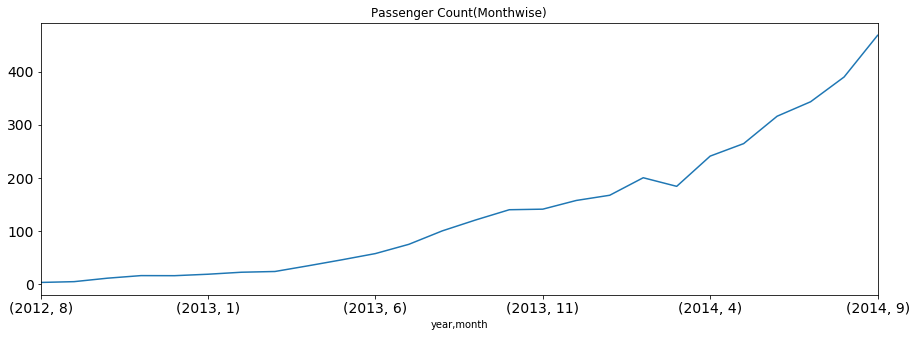

In [12]:
temp=train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

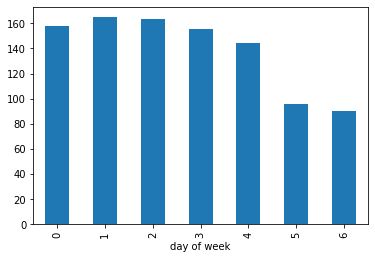

In [13]:
train.groupby('day of week')['Count'].mean().plot.bar()
# Traffic on weekdays will be more

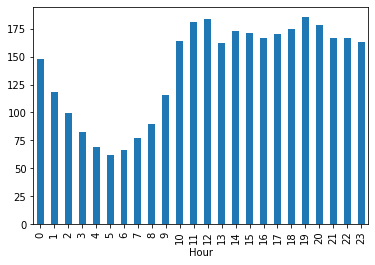

In [14]:
train.groupby('Hour')['Count'].mean().plot.bar()
# Traffic during the peak hours will be high

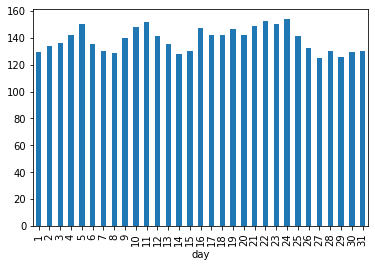

In [15]:
train.groupby('day')['Count'].mean().plot.bar()

In [16]:
train=train.drop('ID',1)

In [17]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

# Converting to weekly mean
weekly = train.resample('W').mean()

# Converting to monthly mean
monthly = train.resample('M').mean()

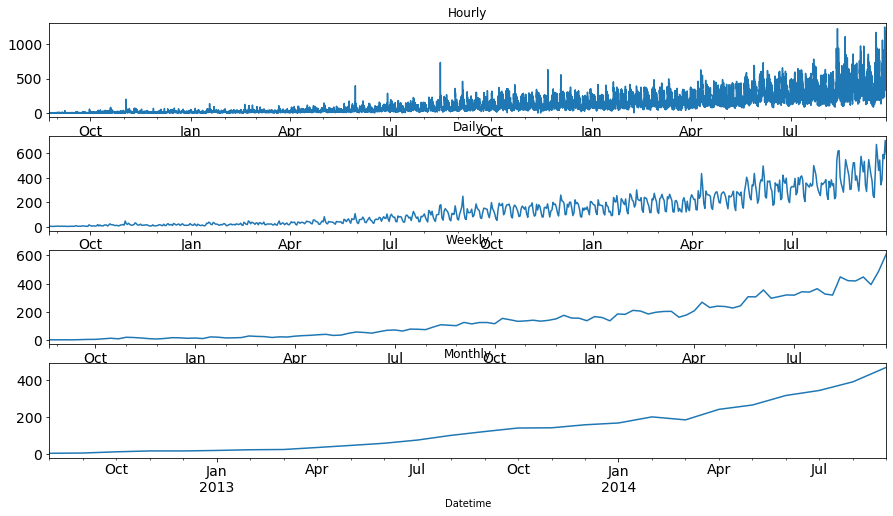

In [18]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

### We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

### But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [19]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

In [20]:
X_train=train.ix['2012-08-25':'2014-06-24']
X_test=train.ix['2014-06-25':'2014-09-25']

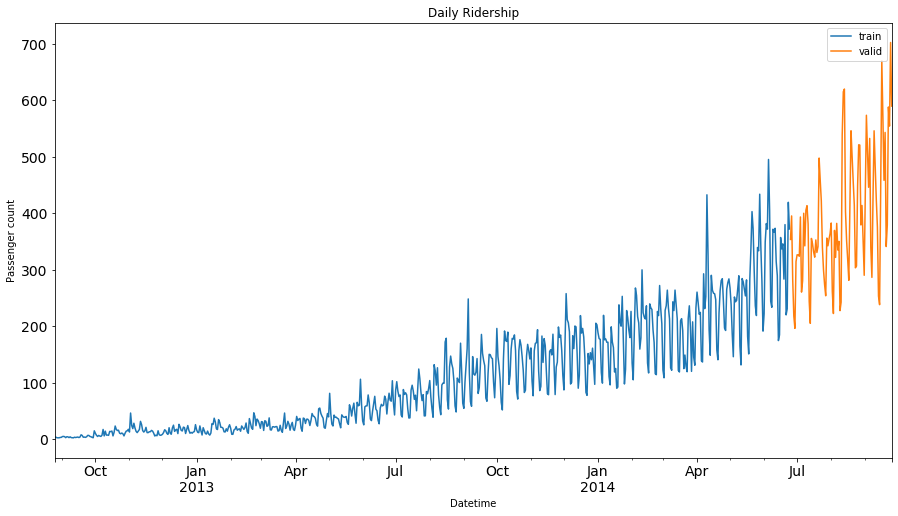

In [21]:
X_train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
X_test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

## 2) Modeling techniques

#### i) Naive Approach
#### ii) Moving Average
#### iii) Simple Exponential Smoothing
#### iv) Holt’s Linear Trend Model

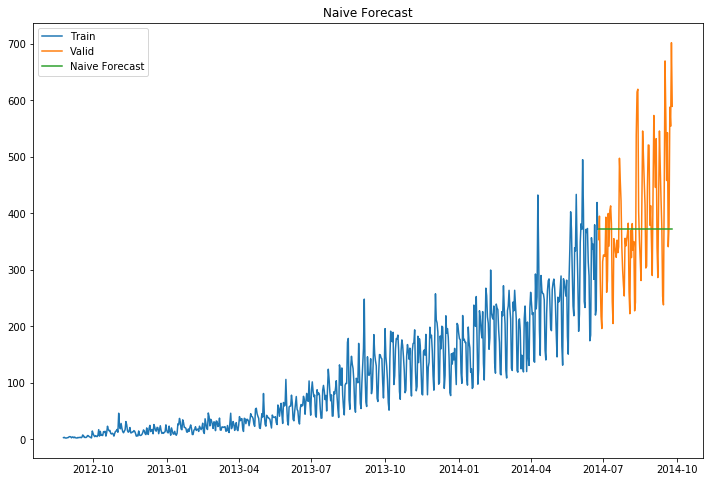

In [22]:
# i) Naive Approach

dd= np.asarray(X_train.Count)
y_hat = X_test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(X_train.index, X_train['Count'], label='Train')
plt.plot(X_test.index,X_test['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [23]:
rms = {}
from sklearn.metrics import mean_squared_error
from math import sqrt
rms['Naive'] = sqrt(mean_squared_error(X_test.Count, y_hat.naive))
print(rms['Naive'])

111.79050467496724


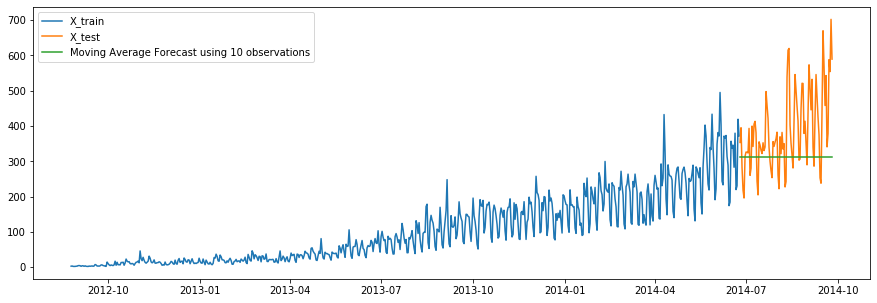

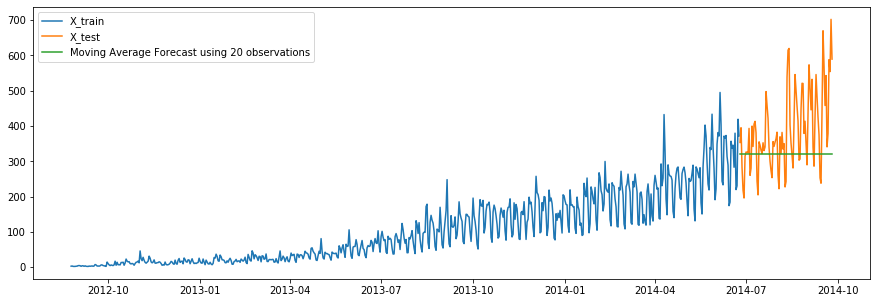

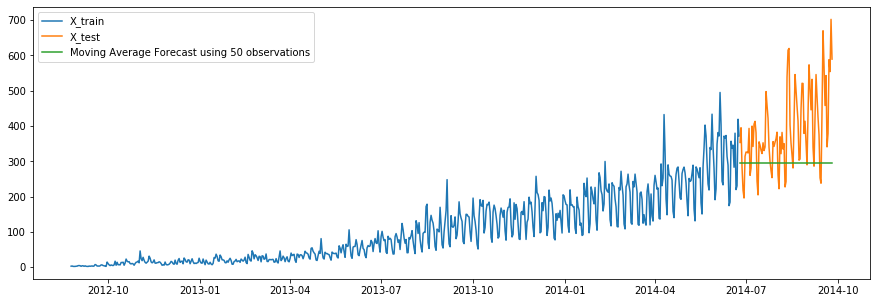

In [24]:
# ii) Moving Average

y_hat_avg = X_test.copy()
y_hat_avg['moving_avg_forecast'] = X_train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(X_train['Count'], label='X_train')
plt.plot(X_test['Count'], label='X_test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()
y_hat_avg = X_test.copy()
y_hat_avg['moving_avg_forecast'] = X_train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations.
plt.figure(figsize=(15,5))
plt.plot(X_train['Count'], label='X_train')
plt.plot(X_test['Count'], label='X_test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()
y_hat_avg = X_test.copy()
y_hat_avg['moving_avg_forecast'] = X_train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations.
plt.figure(figsize=(15,5))
plt.plot(X_train['Count'], label='X_train')
plt.plot(X_test['Count'], label='X_test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [25]:
rms['Moving Average'] = sqrt(mean_squared_error(X_test.Count, y_hat_avg.moving_avg_forecast))
print(rms['Moving Average'])

144.19175679986802


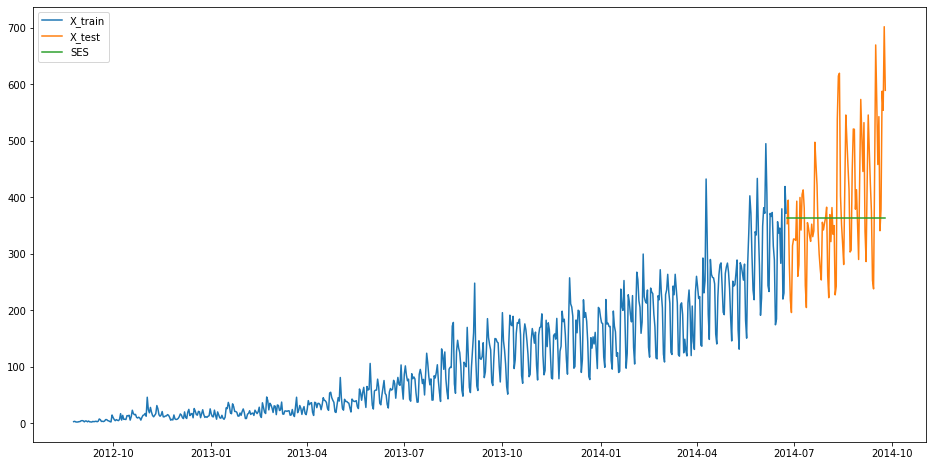

In [26]:
# iii) Simple Exponential Smoothing

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = X_test.copy()
fit2 = SimpleExpSmoothing(np.asarray(X_train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(X_test))
plt.figure(figsize=(16,8))
plt.plot(X_train['Count'], label='X_train')
plt.plot(X_test['Count'], label='X_test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [27]:
rms['Exponential Smoothing'] = sqrt(mean_squared_error(X_test.Count, y_hat_avg.SES))
print(rms['Exponential Smoothing'])

113.43708111884514


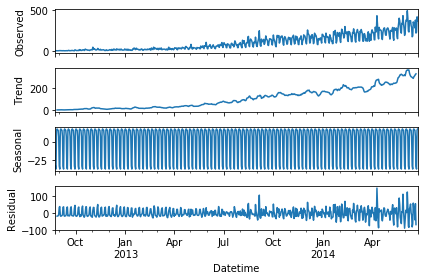

In [28]:
# iv. Holt’s Linear Trend

import statsmodels.api as sm
sm.tsa.seasonal_decompose(X_train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

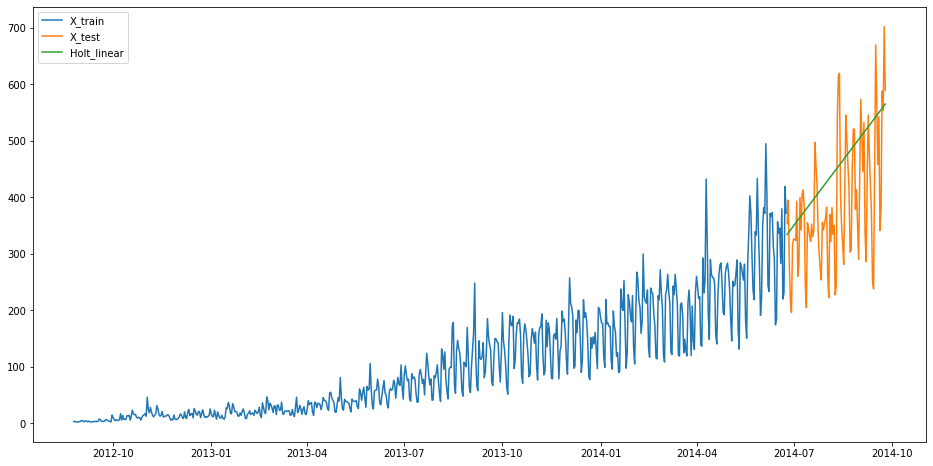

In [29]:
y_hat_avg = X_test.copy()

fit1 = Holt(np.asarray(X_train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(X_test))

plt.figure(figsize=(16,8))
plt.plot(X_train['Count'], label='X_train')
plt.plot(X_test['Count'], label='X_test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [30]:
rms['Holt'] = sqrt(mean_squared_error(X_test.Count, y_hat_avg.Holt_linear))
print(rms['Holt'])

112.94278345314041


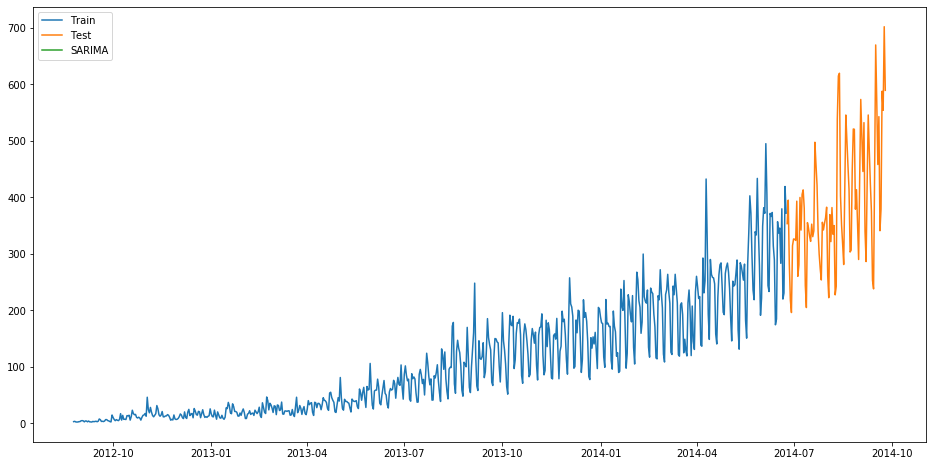

In [33]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(X_train['Count'], label='Train')
plt.plot(X_test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()